## Detecting natural disasters, damage, and incidents in the wild
> Paper: https://www.ecva.net/papers/eccv_2020/papers_ECCV/papers/123640324.pdf <br>
> Repositório no github: https://github.com/ethanweber/IncidentsDataset/tree/master?tab=readme-ov-file

Setup Environment

In [1]:
!git clone https://github.com/ethanweber/IncidentsDataset

Cloning into 'IncidentsDataset'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 201 (delta 31), reused 22 (delta 22), pack-reused 156 (from 1)
Receiving objects: 100% (201/201), 76.70 MiB | 22.43 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [ ]:
cd IncidentsDataset

/content/IncidentsDataset


In [2]:
# prompt: install conda with python 3.8.2

!wget https://repo.anaconda.com/miniconda/Miniconda3-py38_4.12.0-Linux-x86_64.sh
!chmod +x Miniconda3-py38_4.12.0-Linux-x86_64.sh
!bash ./Miniconda3-py38_4.12.0-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages')
!conda install -c conda-forge python=3.8.2
!python --version


--2025-01-19 19:09:36--  https://repo.anaconda.com/miniconda/Miniconda3-py38_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76120962 (73M) [application/x-sh]
Saving to: ‘Miniconda3-py38_4.12.0-Linux-x86_64.sh’

Miniconda3-py38_4.1 100%[===================>]  72.59M  31.1MB/s    in 2.3s    

2025-01-19 19:09:40 (31.1 MB/s) - ‘Miniconda3-py38_4.12.0-Linux-x86_64.sh’ saved [76120962/76120962]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py38h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py38h06a4308_2
    - cffi==1.15.0=py38hd667e15_1
    - c

In [3]:
!conda create -n incidents python=3.8.2

Solving environment: | unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.
Solving environment: - \ | / - done

## Package Plan ##

  environment location: /usr/local/envs/incidents

  added / updated specs:
    - python=3.8.2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2024.12.31 |       h06a4308_0         128 KB
    ld_impl_linux-64-2.40      |       h12ee557_0         710 KB
    libgcc-ng-11.2.0           |       h1234567_1         5.3 MB
    libgomp-11.2.0             |       h1234567_1         474 KB
    libstdcxx-ng-11.2.0        |       h1234567_1         4.7 MB
    ncurses-6.4                |       h6a678d5_0         914 KB
    openssl-1.1.1w             |       h7f8727e_0         3.7 MB
    pip-24.2                   |   py38h06a4308

In [5]:
# Use conda init to properly initialize conda
!conda init bash

# Activate the base environment (necessary after conda init)
!source /usr/local/etc/profile.d/conda.sh

# Activate the incidents environment
!conda activate incidents

# Update conda within the incidents environment
!conda update -n incidents conda

!python --version

!conda list

!ls -la

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.8/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
modified      /root/.bashrc

==> For changes to take effect, close and re-open your current shell. <==

usage: conda [-h] [--no-plugins] [-V] COMMAND ...
conda: error: argument COMMAND: invalid choice: 'activate' (choose from 'clean', 'compare', 'config', 'create', 'info', 'init', 'install', 'list', 'notices', 'package', 'remove', 'uninstall', 'rename', 'run', 'search', 'update', 'upgrade', 'doctor', 'content-trust', 'env')

PackageNotInstalledError: Package is not installed in

In [107]:
! source activate incidents

In [10]:
cd IncidentsDataset

/content/IncidentsDataset


In [11]:
ls #tem que estar denrto do IncidentsDataset

architectures.py  example_images/  pretrained_weights/      RunModel.ipynb
categories/       LICENSE          README.md                run_model.py
configs/          loss.py          requirements.txt         utils.py
dataset.py        metrics.py       run_demo_server.py       VisualizeDataset.ipynb
docs/             parser.py        run_download_weights.py


In [12]:
!pip install -r requirements.txt

     |████████████████████████████████| 308 kB 3.6 MB/s 
     |████████████████████████████████| 120 kB 66.6 MB/s 
     |████████████████████████████████| 68 kB 6.6 MB/s 
     |████████████████████████████████| 49.4 MB 319 kB/s 
     |████████████████████████████████| 797.1 MB 5.0 kB/s 
     |████████████████████████████████| 7.0 MB 5.1 MB/s 
     |████████████████████████████████| 11.6 MB 149 kB/s 
     |████████████████████████████████| 12.4 MB 142 kB/s 
     |████████████████████████████████| 42 kB 1.7 MB/s 
     |████████████████████████████████| 61 kB 466 kB/s 
     |████████████████████████████████| 319 kB 66.1 MB/s 
     |████████████████████████████████| 17.3 MB 74 kB/s 
     |████████████████████████████████| 798 kB 29.5 MB/s 
     |████████████████████████████████| 106 kB 52.2 MB/s 
     |████████████████████████████████| 437 kB 49.4 MB/s 
     |████████████████████████████████| 85 kB 4.4 MB/s 
     |████████████████████████████████| 4.5 MB 60.3 MB/s 
     |██████████████████

In [13]:
!pip install googledrivedownloader==0.4

  Attempting uninstall: googledrivedownloader
    Found existing installation: googledrivedownloader 1.1.0
    Uninstalling googledrivedownloader-1.1.0:
      Successfully uninstalled googledrivedownloader-1.1.0


In [15]:
!ls

architectures.py  example_images  pretrained_weights	   RunModel.ipynb
categories	  LICENSE	  README.md		   run_model.py
configs		  loss.py	  requirements.txt	   utils.py
dataset.py	  metrics.py	  run_demo_server.py	   VisualizeDataset.ipynb
docs		  parser.py	  run_download_weights.py


A partir deste ponto tenha certeza de que voce se encontra dentro do "IncidentsDataset/"

In [ ]:
##usei a versão googledrivedownloader==0.4
##alterei no requirements.txt
#mudei paraa google_drive_downloader
##mudei a direção dentro do run_download_weights.py para dentro de InsidentsDataset/pretrained_weights

In [16]:
!python run_download_weights.py

  0% 0/8 [00:00<?, ?it/s]Downloading 1HCkYHzXV-nGjRy3iehrr6y90COgG67Jh into pretrained_weights/resnet18_places365.pth.tar... Done.
 12% 1/8 [00:07<00:53,  7.69s/it]Downloading 1NZHVWK9T-n6mjpAIjrIRtILRV2KcJAlP into pretrained_weights/resnet50_places365.pth.tar... Done.
 25% 2/8 [00:16<00:48,  8.04s/it]Downloading 1rkCIdcA2YDGMxEoVDk79cp27HakwQLGd into pretrained_weights/eccv_baseline_model_trunk.pth.tar... Done.
 38% 3/8 [00:22<00:37,  7.47s/it]Downloading 1jj1DJsZgPqS4u4UYOJa_xqq_1ywlinnl into pretrained_weights/eccv_baseline_model_incident.pth.tar... Done.
 50% 4/8 [00:26<00:25,  6.32s/it]Downloading 1Tovfkt5UP3Nf5moT2QcVqRkB7Nz_D5nh into pretrained_weights/eccv_baseline_model_place.pth.tar... Done.
 62% 5/8 [00:28<00:15,  5.21s/it]Downloading 1XbPMbKOBkj6EXjMZa4ybOezI6NMZwLOK into pretrained_weights/eccv_final_model_trunk.pth.tar... Done.
 75% 6/8 [00:38<00:12,  6.40s/it]Downloading 1D3Nh-CqK0jTXu3fgcTwkLSIlQzgApFzu into pretrained_weights/eccv_final_model_incident.pth.tar... Done.


In [ ]:
pip freeze

asttokens==3.0.0
backcall==0.2.0
boltons @ file:///croot/boltons_1677628692245/work
Brotli @ file:///croot/brotli-split_1714483155106/work
certifi @ file:///croot/certifi_1725551672989/work/certifi
cffi @ file:///opt/conda/conda-bld/cffi_1642701102775/work
chardet==3.0.4
charset-normalizer @ file:///croot/charset-normalizer_1721748349566/work
conda @ file:///home/conda/feedstock_root/build_artifacts/conda_1694556035267/work
conda-package-handling @ file:///tmp/build/80754af9/conda-package-handling_1649087926789/work
ConfigArgParse==1.2.3
cryptography @ file:///tmp/build/80754af9/cryptography_1639400846433/work
cycler==0.12.1
decorator==5.1.1
dill==0.3.9
executing==2.1.0
filelock==3.16.1
fsspec==2024.12.0
googledrivedownloader==1.0.0
idna==2.10
imageio==2.35.1
importlib_metadata==8.5.0
ipykernel==5.3.4
ipython==8.12.3
jedi==0.19.2
Jinja2==3.1.5
jsonpatch @ file:///croot/jsonpatch_1714483231291/work
jsonpointer==2.1
jupyter_client==8.6.3
jupyter_core==5.7.2
kiwisolver==1.4.7
MarkupSafe==

RUN MODEL: Script para rodar o modelo

In [17]:
#RUN_MODEL
%load_ext autoreload
%autoreload 2

In [18]:
import os
import pprint
import glob
import json
from tqdm import tqdm
import cv2
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from architectures import (
    FilenameDataset,
    get_incidents_model,
    update_incidents_model_with_checkpoint,
    update_incidents_model_to_eval_mode,
    get_predictions_from_model
)
from parser import get_parser, get_postprocessed_args

In [19]:
# data
image_filenames = sorted(glob.glob("example_images/*"))
# model
CONFIG_FILENAME = "configs/eccv_final_model"
CHECKPOINT_PATH_FOLDER = "pretrained_weights/"

In [20]:
# you can replace the filenames with your own
image_filenames

['example_images/earthquake.jpg',
 'example_images/fire.jpg',
 'example_images/flood.jpg',
 'example_images/ship.jpg']

In [1]:
for image_filename in image_filenames:
    img = cv2.imread(image_filename)[:,:,::-1].copy()
    plt.imshow(img)
    plt.show()

NameError: name 'image_filenames' is not defined

In [25]:
# Load model from checkpoint.
parser = get_parser()
args = parser.parse_args(args="--config={} --checkpoint_path={} --mode=test --num_gpus=0".format(CONFIG_FILENAME, CHECKPOINT_PATH_FOLDER))
args = get_postprocessed_args(args)


incidents_model = get_incidents_model(args)
update_incidents_model_with_checkpoint(incidents_model, args)
update_incidents_model_to_eval_mode(incidents_model)

loading places weights for pretraining
Let's use 0 GPUs!
eccv_final_model
Loaded checkpoint 'pretrained_weights/eccv_final_model_trunk.pth.tar' (epoch 15).
Loaded checkpoint 'pretrained_weights/eccv_final_model_place.pth.tar' (epoch 15).
Loaded checkpoint 'pretrained_weights/eccv_final_model_incident.pth.tar' (epoch 15).
Switching to eval mode.


/content/IncidentsDataset/architectures.py:88: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_file, map_location=device)
/content/IncidentsDatas

In [26]:

from IncidentsDataset.utils import get_index_to_incident_mapping, get_index_to_place_mapping

In [1]:
# Set up the data loader for quickly loading images to run inference with.
print("num images: {}".format(len(image_filenames)))
targets = [image_filenames[i] for i in range(len(image_filenames))]
dataset = FilenameDataset(image_filenames, targets)
loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=1,
    shuffle=False,
    num_workers=4
)

inference_dict = {}
for idx, (batch_input, image_paths) in tqdm(enumerate(loader)):
    # run the model, get the output, set the inference_dict
    output = get_predictions_from_model(
        args,
        incidents_model,
        batch_input,
        image_paths,
        get_index_to_incident_mapping(),
        get_index_to_place_mapping(),
        inference_dict,
        topk=5
    )

NameError: name 'image_filenames' is not defined

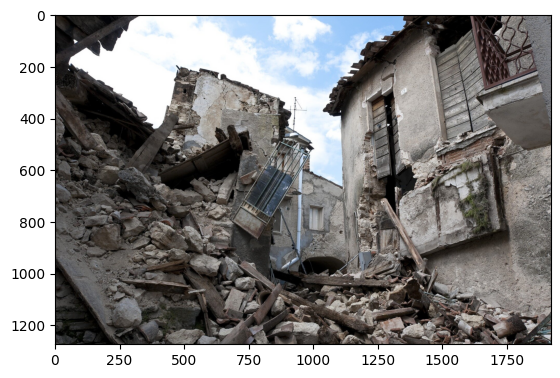

{'incident_probs': array([9.2604744e-01, 1.1029793e-02, 4.4702874e-03, 5.2067509e-04,
       1.9544833e-04], dtype=float32),
 'incidents': ['earthquake',
               'collapsed',
               'damaged',
               'rockslide rockfall',
               'burned'],
 'place_probs': array([0.26566705, 0.13693586, 0.12232041, 0.08357299, 0.07377886],
      dtype=float32),
 'places': ['building outdoor',
            'street',
            'slum',
            'house',
            'religious building']}


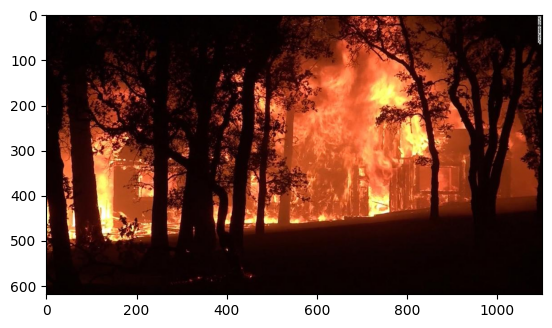

{'incident_probs': array([0.62079424, 0.23121072, 0.06282382, 0.04061117, 0.00209118],
      dtype=float32),
 'incidents': ['wildfire', 'on fire', 'fire whirl', 'burned', 'damaged'],
 'place_probs': array([0.8459488 , 0.07128946, 0.00922022, 0.00707668, 0.00503553],
      dtype=float32),
 'places': ['forest', 'forest road', 'mountain', 'desert', 'highway']}


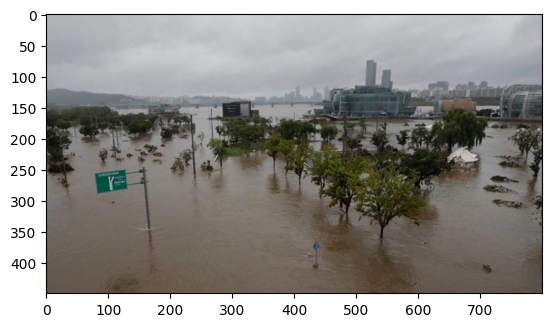

{'incident_probs': array([9.4023949e-01, 2.7635593e-02, 5.2077943e-03, 4.5292038e-03,
       3.0503469e-04], dtype=float32),
 'incidents': ['flooded',
               'tropical cyclone',
               'storm surge',
               'heavy rainfall',
               'mudslide mudflow'],
 'place_probs': array([0.3749591 , 0.15494405, 0.13527143, 0.05341303, 0.03982884],
      dtype=float32),
 'places': ['building outdoor', 'downtown', 'river', 'highway', 'village']}


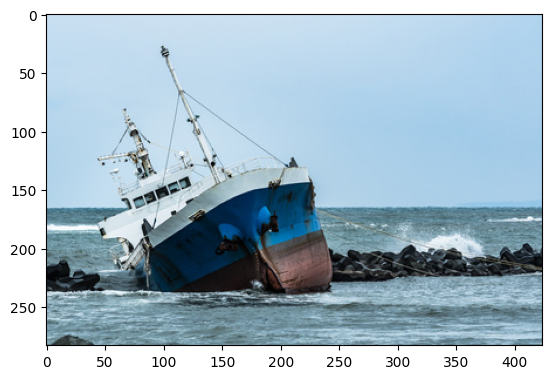

{'incident_probs': array([9.8649371e-01, 6.1292221e-06, 5.3839804e-06, 1.9247248e-06,
       1.7059619e-06], dtype=float32),
 'incidents': ['ship boat accident',
               'storm surge',
               'damaged',
               'airplane accident',
               'collapsed'],
 'place_probs': array([0.41802382, 0.18048409, 0.07916399, 0.02241559, 0.01823319],
      dtype=float32),
 'places': ['ocean', 'beach', 'coast', 'sky', 'port']}


In [28]:
for image_filename in inference_dict:
    img = cv2.imread(image_filename)[:,:,::-1].copy()
    plt.imshow(img)
    plt.show()
    pprint.pprint(inference_dict[image_filename])

Salvando o modelo

In [29]:
import skops.io as sio

sio.dump(pipe, "../Model/naturaldisaster.skops")

ModuleNotFoundError: No module named 'skops'

In [ ]:
import torch
import pickle

# Supondo que 'incidents_model' é seu modelo treinado
with open("modelo.pkl", "wb") as f:
    pickle.dump(incidents_model, f)

print("Modelo salvo em 'modelo.pkl'")


Modelo salvo em 'modelo.pkl'


In [ ]:
#Abrindo o modelo salvo em Pickle.

with open("modelo.pkl", "rb") as f:
    incidents_model = pickle.load(f)

In [ ]:
incidents_model

[DataParallel(
   (module): Sequential(
     (0): ResNet(
       (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
       (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (relu): ReLU(inplace=True)
       (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
       (layer1): Sequential(
         (0): Bottleneck(
           (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
           (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
           (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
           (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
           (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
           (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
           (rel

TRAINING THE MODEL

In [ ]:
!pip install protobuf==3.20.*


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.2
    Uninstalling protobuf-5.29.2:
      Successfully uninstalled protobuf-5.29.2


In [ ]:
!python -c "import torch; print(torch.cuda.is_available())"


True


In [ ]:
# train the model
!python IncidentsDataset/run_model.py --num_gpus 1 --mode=test --dataset_test example_images/ \
    --config=IncidentsDataset/configs/eccv_final_model \
    --checkpoint_path=runs/eccv_final_model

# visualize tensorboard
!tensorboard --samples_per_plugin scalars=100,images=10 --port 8880 --bind_all --logdir IncidentsDataset/runs/eccv_final_model

args: 

Namespace(activation='sigmoid', arch='resnet50', batch_size=256, checkpoint_path='runs/eccv_final_model', config='IncidentsDataset/configs/eccv_final_model', dataset='pos_and_neg', dataset_test='example_images/', dataset_train='data/eccv_train.json', dataset_val='data/eccv_val.json', epochs=10, fc_dim=1024, ignore_places_during_training=False, images_path='data/images/', loss=None, lr=0.0001, mode='test', num_gpus=1, num_incidents=43, num_places=49, percent_of_training_set=100, pretrained=True, pretrained_with_places=True, print_freq=10, start_epoch=0, weight_decay=0.0001, workers=16)
creating model with feature trunk architecture: 'resnet50'
loading places weights for pretraining
/content/IncidentsDataset/architectures.py:88: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See ht

Testando a criação de um pipeline para o modelo


loading places weights for pretraining
Let's use 0 GPUs!
eccv_final_model
Loaded checkpoint 'pretrained_weights/eccv_final_model_trunk.pth.tar' (epoch 15).
Loaded checkpoint 'pretrained_weights/eccv_final_model_place.pth.tar' (epoch 15).
Loaded checkpoint 'pretrained_weights/eccv_final_model_incident.pth.tar' (epoch 15).
Switching to eval mode.


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
4it [00:00,  4.36it/s]


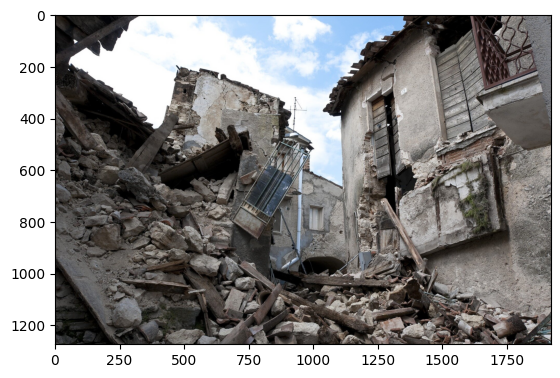

{'incident_probs': array([9.2604744e-01, 1.1029793e-02, 4.4702874e-03, 5.2067509e-04,
       1.9544833e-04], dtype=float32),
 'incidents': ['earthquake',
               'collapsed',
               'damaged',
               'rockslide rockfall',
               'burned'],
 'place_probs': array([0.26566705, 0.13693586, 0.12232041, 0.08357299, 0.07377886],
      dtype=float32),
 'places': ['building outdoor',
            'street',
            'slum',
            'house',
            'religious building']}


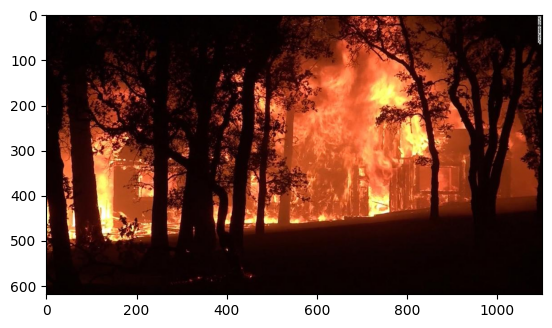

{'incident_probs': array([0.62079424, 0.23121072, 0.06282382, 0.04061117, 0.00209118],
      dtype=float32),
 'incidents': ['wildfire', 'on fire', 'fire whirl', 'burned', 'damaged'],
 'place_probs': array([0.8459488 , 0.07128946, 0.00922022, 0.00707668, 0.00503553],
      dtype=float32),
 'places': ['forest', 'forest road', 'mountain', 'desert', 'highway']}


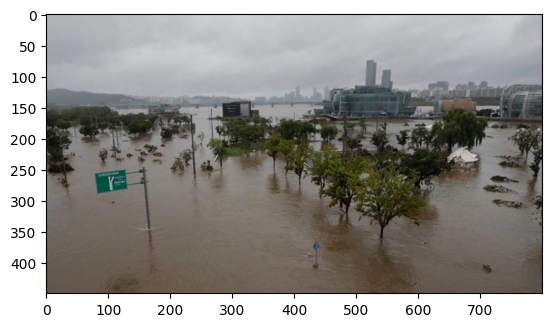

{'incident_probs': array([9.4023949e-01, 2.7635593e-02, 5.2077943e-03, 4.5292038e-03,
       3.0503469e-04], dtype=float32),
 'incidents': ['flooded',
               'tropical cyclone',
               'storm surge',
               'heavy rainfall',
               'mudslide mudflow'],
 'place_probs': array([0.3749591 , 0.15494405, 0.13527143, 0.05341303, 0.03982884],
      dtype=float32),
 'places': ['building outdoor', 'downtown', 'river', 'highway', 'village']}


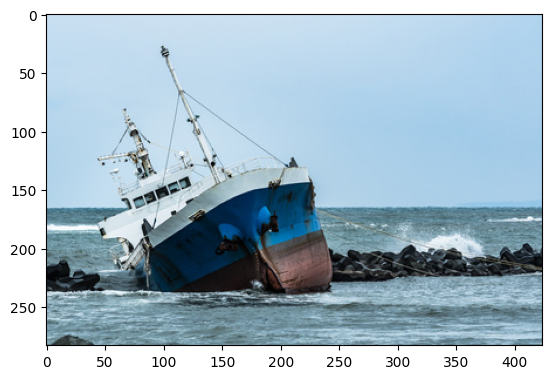

{'incident_probs': array([9.8649371e-01, 6.1292221e-06, 5.3839804e-06, 1.9247248e-06,
       1.7059619e-06], dtype=float32),
 'incidents': ['ship boat accident',
               'storm surge',
               'damaged',
               'airplane accident',
               'collapsed'],
 'place_probs': array([0.41802382, 0.18048409, 0.07916399, 0.02241559, 0.01823319],
      dtype=float32),
 'places': ['ocean', 'beach', 'coast', 'sky', 'port']}


In [64]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import glob
import torch
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import pprint

# Classe: Carregar imagens
class LoadImages(BaseEstimator, TransformerMixin):
    def __init__(self, path_pattern="example_images/*"):
        self.path_pattern = path_pattern

    def fit(self, X=None, y=None):
        return self

    def transform(self, X=None):
        image_filenames = sorted(glob.glob(self.path_pattern))
        if not image_filenames:
            raise ValueError("No images found with the provided path pattern.")
        return image_filenames

# Classe: Carregar modelo
class LoadModel(BaseEstimator, TransformerMixin):
    def __init__(self, config_filename, checkpoint_folder):
        self.config_filename = config_filename
        self.checkpoint_folder = checkpoint_folder

    def fit(self, X=None, y=None):
        from architectures import (
            get_incidents_model,
            update_incidents_model_with_checkpoint,
            update_incidents_model_to_eval_mode
        )
        from parser import get_parser, get_postprocessed_args

        parser = get_parser()
        args = parser.parse_args(
            args=f"--config={self.config_filename} --checkpoint_path={self.checkpoint_folder} --mode=test --num_gpus=0"
        )
        self.args = get_postprocessed_args(args)
        self.model = get_incidents_model(self.args)
        update_incidents_model_with_checkpoint(self.model, self.args)
        update_incidents_model_to_eval_mode(self.model)
        return self

    def transform(self, X=None):
        return {"model": self.model, "args": self.args}

# Classe: Executar inferência
class RunInference(BaseEstimator, TransformerMixin):
    def __init__(self, batch_size=1, num_workers=4, topk=5):
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.topk = topk

    def fit(self, X=None, y=None):
        return self

    def transform(self, X):
        image_filenames = X["image_filenames"]
        model = X["model"]
        args = X["args"]

        from architectures import get_predictions_from_model
        from IncidentsDataset.utils import get_index_to_incident_mapping, get_index_to_place_mapping

        dataset = FilenameDataset(image_filenames, targets=image_filenames)
        loader = torch.utils.data.DataLoader(
            dataset,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=self.num_workers
        )

        inference_dict = {}
        for _, (batch_input, image_paths) in tqdm(enumerate(loader)):
            get_predictions_from_model(
                args,
                model,
                batch_input,
                image_paths,
                get_index_to_incident_mapping(),
                get_index_to_place_mapping(),
                inference_dict,
                topk=self.topk
            )
        return inference_dict

# Atualizando o pipeline para conectar corretamente as etapas
class CombineSteps(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, data):
        #print(type(data['model'][0]))
        return {
            "image_filenames": image_filenames,
            "model": data["model"],
            "args": data["args"]
        }

# Pipeline ajustado
pipeline = Pipeline([
    ("load_images", LoadImages()),
    ("load_model", LoadModel(CONFIG_FILENAME, CHECKPOINT_PATH_FOLDER)),
    ("combine", CombineSteps()),  # Conecta imagens e modelo
    ("run_inference", RunInference())
])

# Executando o pipeline

inference_results = pipeline.fit_transform([])
for image_filename, predictions in inference_results.items():
    img = cv2.imread(image_filename)[:, :, ::-1].copy()
    plt.imshow(img)
    plt.show()
    pprint.pprint(predictions)


In [76]:
predictions = str(predictions)

In [77]:
if not os.path.exists("Results/"):
  os.mkdir("Results")
with open("Results/metrics.txt", "w") as outfile:
    outfile.write(predictions)

In [79]:
predictions

"{'incidents': ['ship boat accident', 'storm surge', 'damaged', 'airplane accident', 'collapsed'], 'places': ['ocean', 'beach', 'coast', 'sky', 'port'], 'incident_probs': array([9.8649371e-01, 6.1292221e-06, 5.3839804e-06, 1.9247248e-06,\n       1.7059619e-06], dtype=float32), 'place_probs': array([0.41802382, 0.18048409, 0.07916399, 0.02241559, 0.01823319],\n      dtype=float32)}"

In [81]:
pip install skops

     |████████████████████████████████| 120 kB 3.5 MB/s 
     |████████████████████████████████| 450 kB 24.4 MB/s 
     |████████████████████████████████| 11.1 MB 10.5 MB/s 
     |████████████████████████████████| 746 kB 61.3 MB/s 
     |████████████████████████████████| 301 kB 63.7 MB/s 


In [88]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=28741e1846de8408ff5ccd695e595902f541a564bfa27121343587b39e5249d6
  Stored in directory: /root/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [94]:
pip install scikit-learn==1.2.2  # Exemplo de versão compatível


     |████████████████████████████████| 9.8 MB 3.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [95]:
pip install scikit-learn skops --force-reinstall


  Using cached scikit_learn-1.3.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.1 MB)
  Using cached skops-0.9.0-py3-none-any.whl (120 kB)
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
     |████████████████████████████████| 65 kB 1.7 MB/s 
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached huggingface_hub-0.27.1-py3-none-any.whl (450 kB)
  Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
  Using cached PyYAML-6.0.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (746 kB)
     |████████████████████████████████| 64 kB 2.2 MB/s 
  Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Using cached fsspec-2024.12.0-py3-none-any.whl (183 kB)
     |████████████████████████████████

In [100]:
#NNão funcionando
import skops.io as sio

sio.dump(pipeline, "Model/drug_pipeline.skops")

ImportError: cannot import name 'Huber' from 'sklearn.linear_model._sgd_fast' (/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sgd_fast.cpython-311-x86_64-linux-gnu.so)

In [101]:
import joblib

if not os.path.exists("Model/"):
  os.mkdir("Model")
joblib.dump(pipeline, "Model/incidents_model.joblib")
# Para carregar o modelo:
pipe = joblib.load("Model/incidents_model.joblib")


In [102]:
pipe

Pipeline(steps=[('load_images', LoadImages()),
                ('load_model',
                 LoadModel(checkpoint_folder='pretrained_weights/',
                           config_filename='configs/eccv_final_model')),
                ('combine', CombineSteps()),
                ('run_inference', RunInference())])

In [105]:
import shutil

folder_path = "../IncidentsDataset/"
output_filename = "projeto.zip"

shutil.make_archive(output_filename.replace(".zip", ""), 'zip', folder_path)
print(f"Pasta {folder_path} compactada como {output_filename}.")


Pasta ../IncidentsDataset/ compactada como projeto.zip.


In [106]:
from google.colab import files

files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>